# Importing zeff and modules for demonstrations

In [1]:
import zeff
import matplotlib.pyplot as plt

from mendeleev.fetch import fetch_table
from mendeleev import element
import numpy as np
import pandas as pd


In [ ]:
zeff.__version__

The module matplotlib is for plotting. The others are going to be used in some examples.

# Data summary for an element

`zeff.elem_data('element symbol')` returns a table (actually a Pandas DataFrame) with the the first and second quantum numbers of each orbital in the element electron configuration; Slater and Clementi screening constants; Slater and Clementi effective nuclear charge; total shielding percentage.

In [3]:
zeff.elem_data("N")

,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,6.7,0.3,4.285714,6.6651,0.3349,4.784286
1,2,s,0,2s,3.9,3.1,44.285714,3.8474,3.1526,45.037143
2,2,p,1,2p,3.9,3.1,44.285714,3.8340,3.1660,45.228571


In [4]:
zeff.elem_data("N")


,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,6.7,0.3,4.285714,6.6651,0.3349,4.784286
1,2,s,0,2s,3.9,3.1,44.285714,3.8474,3.1526,45.037143
2,2,p,1,2p,3.9,3.1,44.285714,3.8340,3.1660,45.228571


In [5]:
zeff.slater("H")


SlaterInfo(effective_nuclear_charge=[1.0], screening_values=[0.0], screening_percentage=[0.0])

In [6]:
zeff.clementi("H")


ClementiInfo(effective_nuclear_charge=[1.0], screening_values=[0.0], screening_percentage=[0.0])

In [7]:
zeff.elem_data("H")


,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
zeff.elem_data("Li")

,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,2.7,0.3,10.000000,2.6906,0.3094,10.313333
1,2,s,0,2s,1.3,1.7,56.666667,1.2792,1.7208,57.360000


In [9]:
zeff.elem_data("P")


,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,14.70,0.30,2.000000,14.5578,0.4422,2.948000
1,2,s,0,2s,10.85,4.15,27.666667,9.8250,5.1750,34.500000
2,2,p,1,2p,10.85,4.15,27.666667,10.9612,4.0388,26.925333
3,3,s,0,3s,4.80,10.20,68.000000,5.6418,9.3582,62.388000
4,3,p,1,3p,4.80,10.20,68.000000,4.8864,10.1136,67.424000


In [10]:
zeff.elem_data("P")


,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,14.70,0.30,2.000000,14.5578,0.4422,2.948000
1,2,s,0,2s,10.85,4.15,27.666667,9.8250,5.1750,34.500000
2,2,p,1,2p,10.85,4.15,27.666667,10.9612,4.0388,26.925333
3,3,s,0,3s,4.80,10.20,68.000000,5.6418,9.3582,62.388000
4,3,p,1,3p,4.80,10.20,68.000000,4.8864,10.1136,67.424000


In [11]:
zeff.elem_data("Ni")

,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,27.70,0.30,1.071429,27.3526,0.6474,2.312143
1,2,s,0,2s,23.85,4.15,14.821429,20.2126,7.7874,27.812143
2,2,p,1,2p,23.85,4.15,14.821429,24.0952,3.9048,13.945714
3,3,s,0,3s,16.75,11.25,40.178571,14.9610,13.0390,46.567857
4,3,p,1,3p,16.75,11.25,40.178571,14.0850,13.9150,49.696429
5,3,d,2,3d,7.55,20.45,73.035714,12.5295,15.4705,55.251786
6,4,s,0,4s,4.05,23.95,85.535714,5.7108,22.2892,79.604286


In [12]:
zeff.elem_data("Sn")

,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,49.70,0.30,0.6,48.9920,1.0080,2.0160
1,2,s,0,2s,45.85,4.15,8.3,36.8594,13.1406,26.2812
2,2,p,1,2p,45.85,4.15,8.3,45.8854,4.1146,8.2292
3,3,s,0,3s,38.75,11.25,22.5,32.4198,17.5802,35.1604
4,3,p,1,3p,38.75,11.25,22.5,32.3532,17.6468,35.2936
5,3,d,2,3d,28.85,21.15,42.3,35.7417,14.2583,28.5166
6,4,s,0,4s,22.25,27.75,55.5,22.6580,27.3420,54.6840
7,4,p,1,4p,22.25,27.75,55.5,21.2652,28.7348,57.4696
8,4,d,2,4d,10.85,39.15,78.3,17.9700,32.0300,64.0600
9,5,s,0,5s,5.65,44.35,88.7,10.6285,39.3715,78.7430


In [13]:
zeff.elem_data("U")

,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,91.70,0.30,0.326087,NaN,NaN,NaN
1,2,s,0,2s,87.85,4.15,4.510870,NaN,NaN,NaN
2,2,p,1,2p,87.85,4.15,4.510870,NaN,NaN,NaN
3,3,s,0,3s,80.75,11.25,12.228261,NaN,NaN,NaN
4,3,p,1,3p,80.75,11.25,12.228261,NaN,NaN,NaN
5,3,d,2,3d,70.85,21.15,22.989130,NaN,NaN,NaN
6,4,s,0,4s,64.25,27.75,30.163043,NaN,NaN,NaN
7,4,p,1,4p,64.25,27.75,30.163043,NaN,NaN,NaN
8,4,d,2,4d,38.85,53.15,57.771739,NaN,NaN,NaN
9,4,f,3,4f,41.45,50.55,54.945652,NaN,NaN,NaN


In [14]:
zeff.elem_data("Ag")


,n,l,l_num,Orbital,Zeff Slater,S Slater,% S Slater,Zeff Clementi,S Clementi,% S Clementi
0,1,s,0,1s,46.70,0.30,0.638298,46.0423,0.9577,2.037660
1,2,s,0,2s,42.85,4.15,8.829787,34.6342,12.3658,26.310213
2,2,p,1,2p,42.85,4.15,8.829787,42.9194,4.0806,8.682128
3,3,s,0,3s,35.75,11.25,23.936170,30.0312,16.9688,36.103830
4,3,p,1,3p,35.75,11.25,23.936170,29.8086,17.1914,36.577447
5,3,d,2,3d,25.85,21.15,45.000000,32.5398,14.4602,30.766383
6,4,s,0,4s,19.25,27.75,59.042553,19.8648,27.1352,57.734468
7,4,p,1,4p,19.25,27.75,59.042553,18.5624,28.4376,60.505532
8,4,d,2,4d,7.85,39.15,83.297872,14.7628,32.2372,68.589787
9,5,s,0,5s,3.70,43.30,92.127660,6.7555,40.2445,85.626596


Since it is a Pandas DataFrame, we can use some Pandas data manipulation. The code below returns the effective nuclear charge (Slater method) for the last orbital of the element silver. Compare with the value from the table above.

In [15]:
zeff.elem_data("Ag")["Zeff Slater"].iloc[-1]


3.700000000000003

The Mendeleev package has a function called `element`, imported at the beginning. It can be used to convert an integer (the atomic number) to an element name or symbol.

In [16]:
element(8).symbol


'O'

Using `element(Z).symbol` where `Z` is an integer (atomic number), the code below generates Pandas DataFrames for the first 36 elements (4 first rows of the periodic table) and takes the effective nuclear charge (both methods) at the last orbital for each element. Then a plot of each method Zeff versus Z is show.

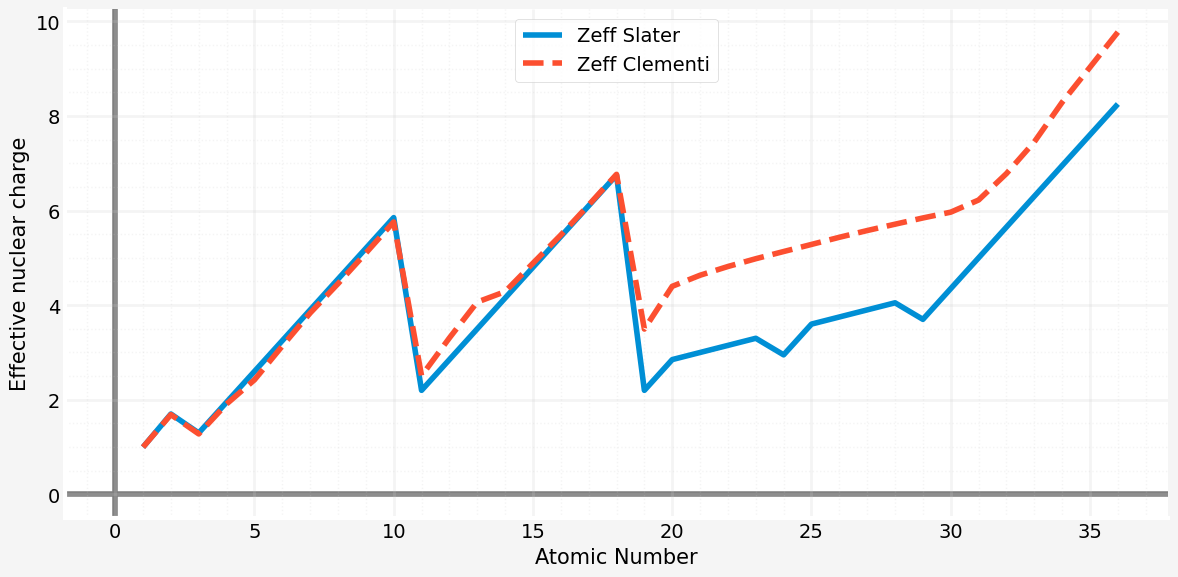

In [17]:
Z = np.arange(1, 37)
Zeff_Slater = [zeff.elem_data(element(int(i)).symbol)["Zeff Slater"].iloc[-1] for i in Z]
Zeff_Clementi = [
    zeff.elem_data(element(int(i)).symbol)["Zeff Clementi"].iloc[-1] for i in Z
]

fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

ax.axhline(color="gray", zorder=-1)
ax.axvline(color="gray", zorder=-1)
ax.grid(which="major", linestyle="-", linewidth=2)
ax.minorticks_on()
ax.grid(which="minor", axis="y", linestyle=":", linewidth=1.0)
ax.grid(which="minor", axis="x", linestyle=":", linewidth=1.0)
ax.tick_params(which="both", labelsize=14)

fontsize = 15
linewidth = 4
x = Z
y1 = Zeff_Slater
y2 = Zeff_Clementi
ax.set_ylabel("Effective nuclear charge", size=fontsize)
ax.set_xlabel("Atomic Number", size=fontsize)

ax.plot(x, y1, linewidth=linewidth, label="Zeff Slater")
ax.plot(x, y2, linewidth=linewidth, label="Zeff Clementi", linestyle="--")

ax.legend(fontsize=fontsize - 1, loc="best", shadow=False, fancybox=True)

plt.show()

# Plots: Effective nuclear charge per orbital

Let's take the second row elements as an example of the plot functions for effective nuclear charge.

Using Slater Zeff values. 

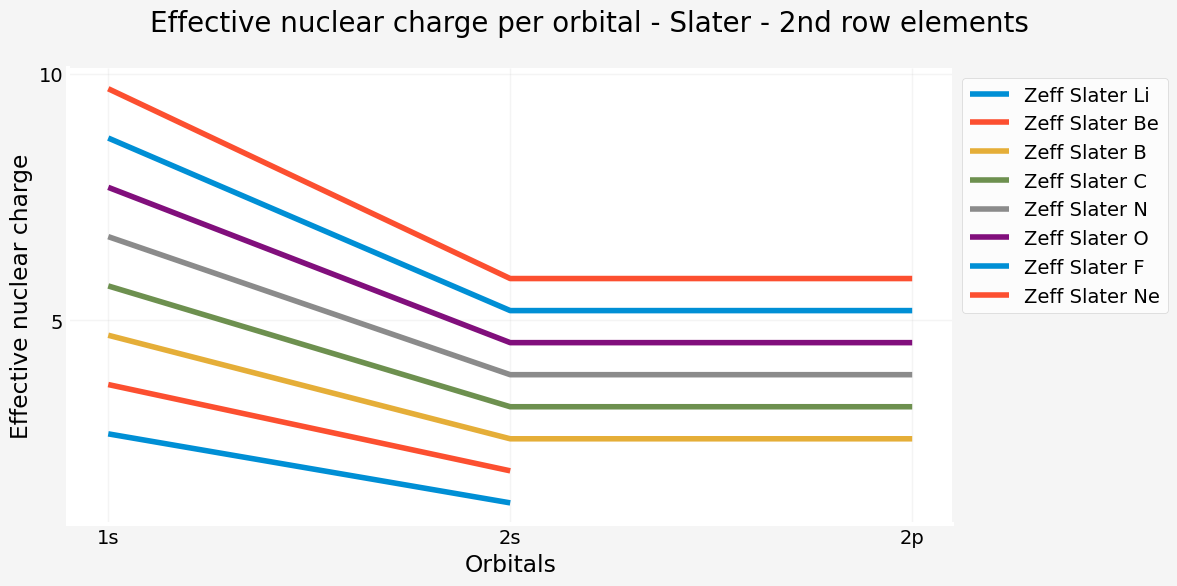

In [18]:
fig2, ax = plt.subplots()

zeff.plot_slater_zeff("Li", ax=ax)
zeff.plot_slater_zeff("Be", ax=ax)
zeff.plot_slater_zeff("B", ax=ax)
zeff.plot_slater_zeff("C", ax=ax)
zeff.plot_slater_zeff("N", ax=ax)
zeff.plot_slater_zeff("O", ax=ax)
zeff.plot_slater_zeff("F", ax=ax)
zeff.plot_slater_zeff("Ne", ax=ax)

fig2.subplots_adjust(top=0.90)
fig2.suptitle(
    "Effective nuclear charge per orbital - Slater - 2nd row elements", fontsize=20
)

plt.show()

Using Clementi Zeff values.

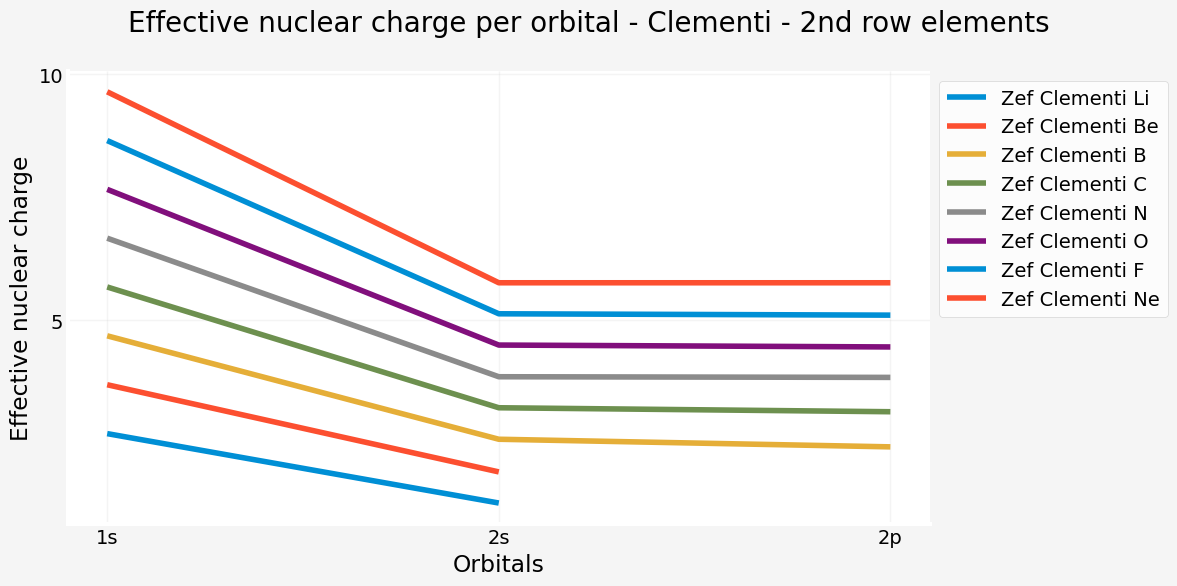

In [19]:
fig3, ax = plt.subplots()

zeff.plot_clementi_zeff("Li", ax=ax)
zeff.plot_clementi_zeff("Be", ax=ax)
zeff.plot_clementi_zeff("B", ax=ax)
zeff.plot_clementi_zeff("C", ax=ax)
zeff.plot_clementi_zeff("N", ax=ax)
zeff.plot_clementi_zeff("O", ax=ax)
zeff.plot_clementi_zeff("F", ax=ax)
zeff.plot_clementi_zeff("Ne", ax=ax)

fig3.subplots_adjust(top=0.90)
fig3.suptitle(
    "Effective nuclear charge per orbital - Clementi - 2nd row elements", fontsize=20
)

plt.show()

As can be seen above, several calls of the same function can be made and the lines will be in the same plot. That's because the functions were made with `ax` inputs so that each line will be in an axis and a plot can have multiple axes.

# Exercise solution

**Question**

The first ionization energy decreases from nitrogen to arsenic (elements from group 15). Is it possible to explain this fact with the concept of effective nuclear charge? And the concept of shielding?

**Solution**

First, let's get the ionization energies values from the Mendeleev database. The database is actually a Pandas DataFrame with columns for the atomic number, the charge (shown as `degree`) and the value in eV (column `energy`).

In [20]:
ptable = fetch_table("ionizationenergies")

In [21]:
ptable.head()


,id,atomic_number,degree,energy
0,1,1,1,13.598434
1,2,2,1,24.587388
2,3,2,2,54.417763
3,4,3,1,5.391715
4,5,3,2,75.640094


Since it is a Pandas dataframe, we can use some manipulation to get the values for nitrogen, phosphorous and arsenic.

In [22]:
z_demo = [7, 15, 33]
ptable.loc[(ptable["atomic_number"].isin(z_demo)) & (ptable["degree"] == 1)]

,id,atomic_number,degree,energy
21,22,7,1,14.534130
105,106,15,1,10.486686
528,529,33,1,9.789000


Now, let's get the effective nuclear charge (both methods) for each element from the previous calculation made for the first plot.

In [23]:
data = [
    ["N", Zeff_Slater[6], Zeff_Clementi[6]],
    ["P", Zeff_Slater[14], Zeff_Clementi[14]],
    ["As", Zeff_Slater[32], Zeff_Clementi[32]],
]

df = pd.DataFrame(data, columns=["Element", "Zef_Slater", "Zef_Clementi"])

df

,Element,Zef_Slater,Zef_Clementi
0,N,3.9,3.8340
1,P,4.8,4.8864
2,As,6.3,7.4492


In [24]:
data = [
    ["N", Zeff_Slater[6], Zeff_Clementi[6]],
    ["P", Zeff_Slater[14], Zeff_Clementi[14]],
    ["As", Zeff_Slater[32], Zeff_Clementi[32]],
]

df = pd.DataFrame(data, columns=["Element", "Zef_Slater", "Zef_Clementi"])

df

,Element,Zef_Slater,Zef_Clementi
0,N,3.9,3.8340
1,P,4.8,4.8864
2,As,6.3,7.4492


As can be seen, the effective nuclear charge *increases* down the group, regardless of the method. This fact is a source of confusion for many students because it seems counterintuitive.

Let's take a look at the shielding percentage.

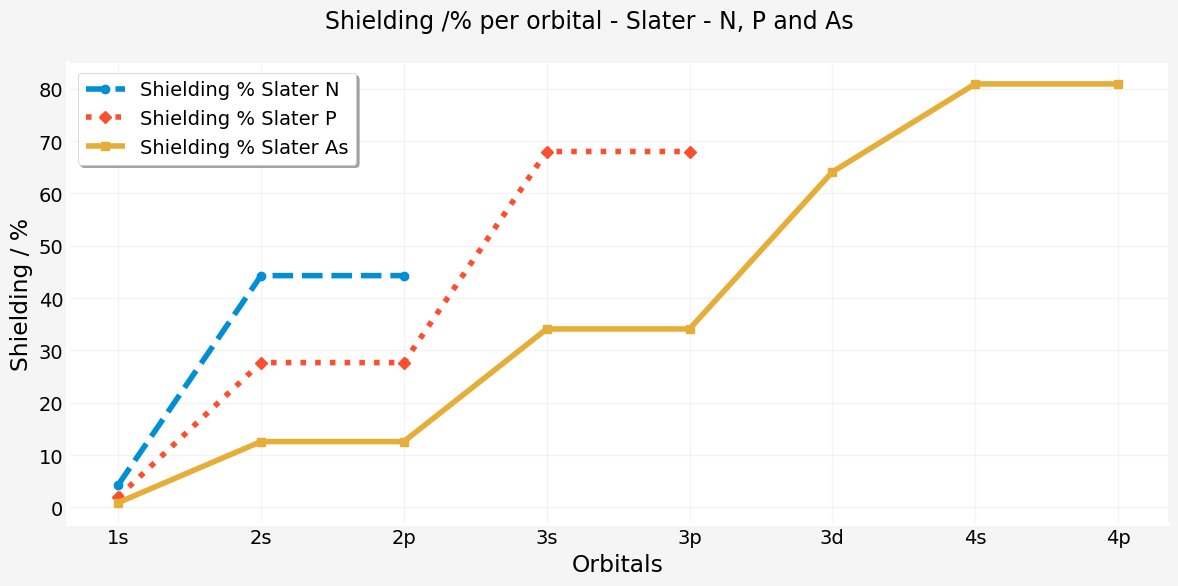

In [25]:
fig4, ax = plt.subplots()

zeff.plot_slater_screening("N", ax=ax, marker="o", linestyle="--")
zeff.plot_slater_screening("P", ax=ax, marker="D", linestyle=":")
zeff.plot_slater_screening("As", ax=ax, marker="s")

fig4.subplots_adjust(top=0.90)
fig4.suptitle("Shielding /% per orbital - Slater - N, P and As", size=17)

plt.show()

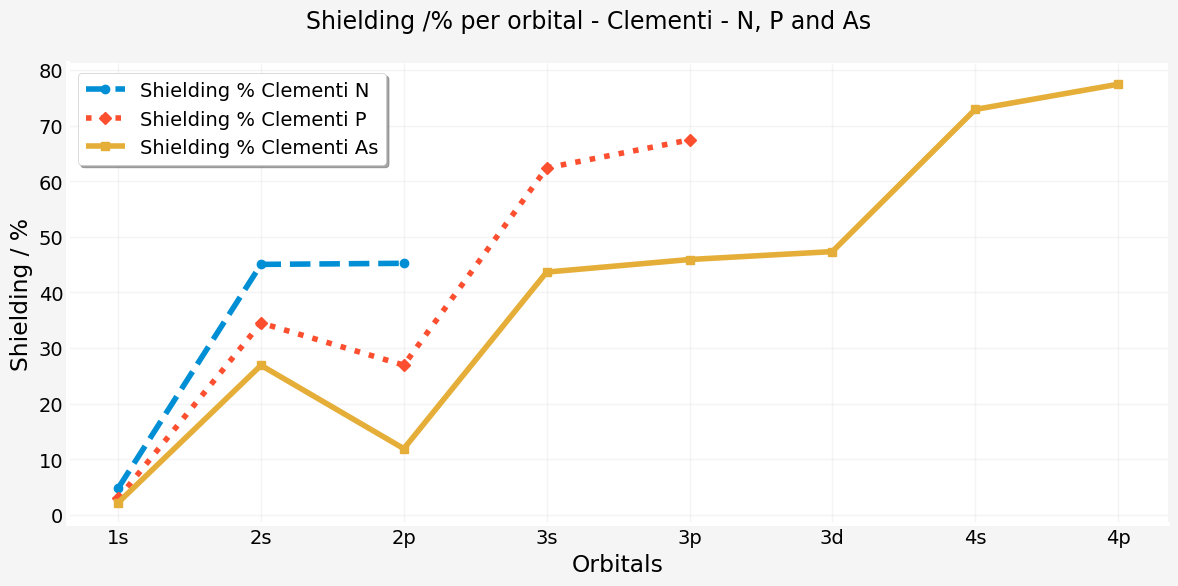

In [26]:
fig5, ax = plt.subplots()

zeff.plot_clementi_screening("N", ax=ax, marker="o", linestyle="--")
zeff.plot_clementi_screening("P", ax=ax, marker="D", linestyle=":")
zeff.plot_clementi_screening("As", ax=ax, marker="s")

fig5.subplots_adjust(top=0.90)
fig5.suptitle("Shielding /% per orbital - Clementi - N, P and As", size=17)

plt.show()

Now it makes sense. Higher shielding on last electron, lower ionization energy.

But why the effective nuclear charge "fails"? Actually, it does not fail. We need to consider other aspects.

The principal quantum number increases down a group and due to the quantum mechanical nature of electrons, the radius of these electron orbitals increases, thus increasing in size as you go down the group. This leads to more shielding from inner electrons. It's difficult to find an exact mathematical formulation.

You can read more about the difficulties on the application of effective nuclear charge concept in the following links:

https://chemistry.stackexchange.com/questions/7142/have-there-been-no-advances-in-the-determination-of-effective-nuclear-charges-si

https://chemistry.stackexchange.com/questions/5621/z-effective-charge-and-ionization-energy

https://chemistry.stackexchange.com/questions/86838/atomic-radius-and-nuclear-effective-charge-in-a-group

https://chemistry.stackexchange.com/questions/62330/why-exactly-does-atomic-radius-increase-down-a-group


# Comparing Slater and Clementi

## Efective nuclear charge values

Element copper as an example.

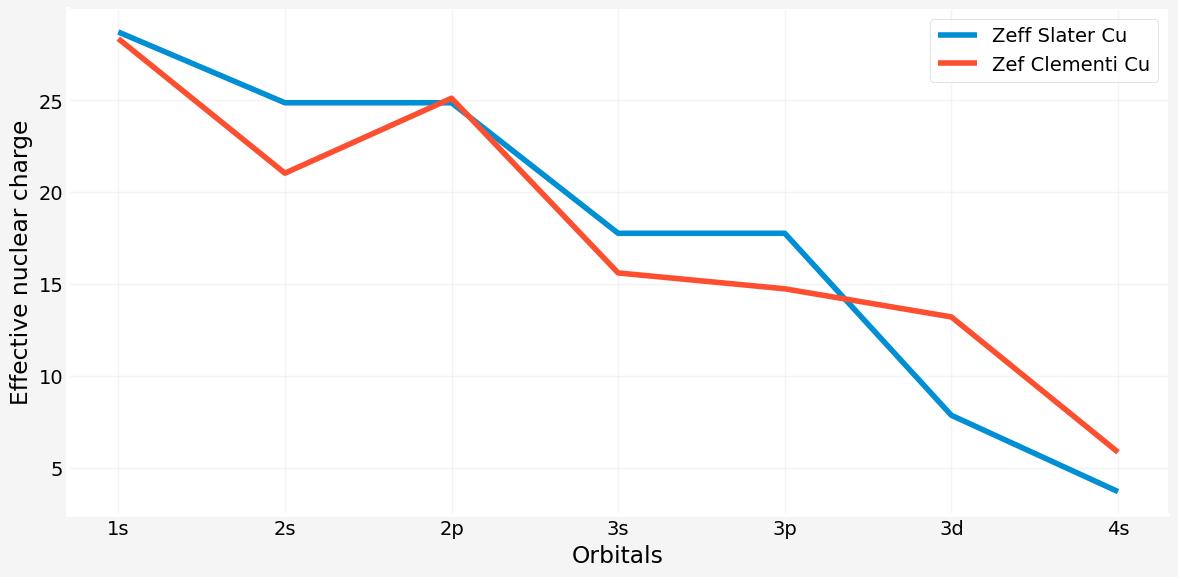

In [27]:
fig6, ax = plt.subplots()

zeff.plot_slater_zeff("Cu", ax=ax)
zeff.plot_clementi_zeff("Cu", ax=ax)

plt.show()

## Shielding values

Element copper as an example.

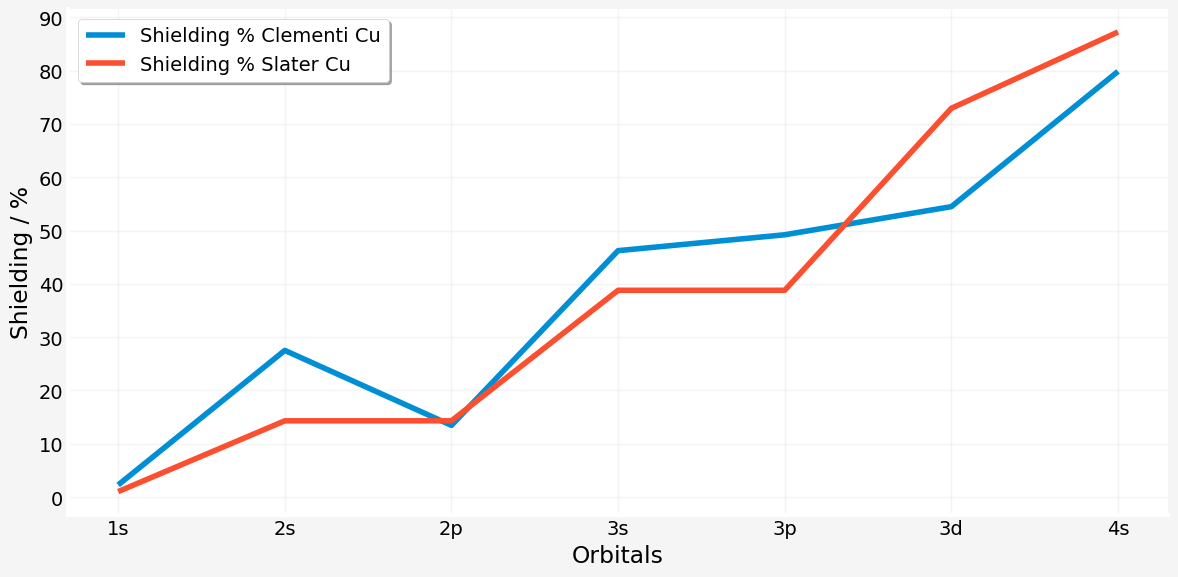

In [28]:
fig7, ax = plt.subplots()

zeff.plot_clementi_screening("Cu", ax=ax)
zeff.plot_slater_screening("Cu", ax=ax)

plt.show()

## Slater efective nuclear charge and shielding percentage

Element copper as an example.

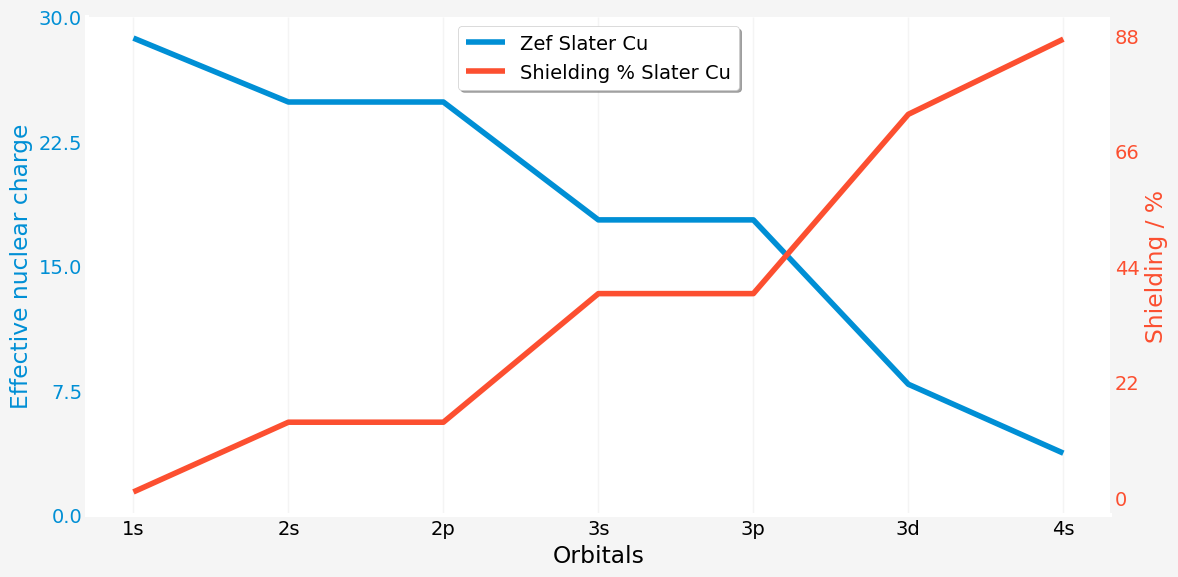

In [29]:
fig8, ax = plt.subplots()

zeff.plot_slater_both("Cu", ax=ax)

plt.show()

## Clementi efective nuclear charge and shielding percentage

Element copper as an example.

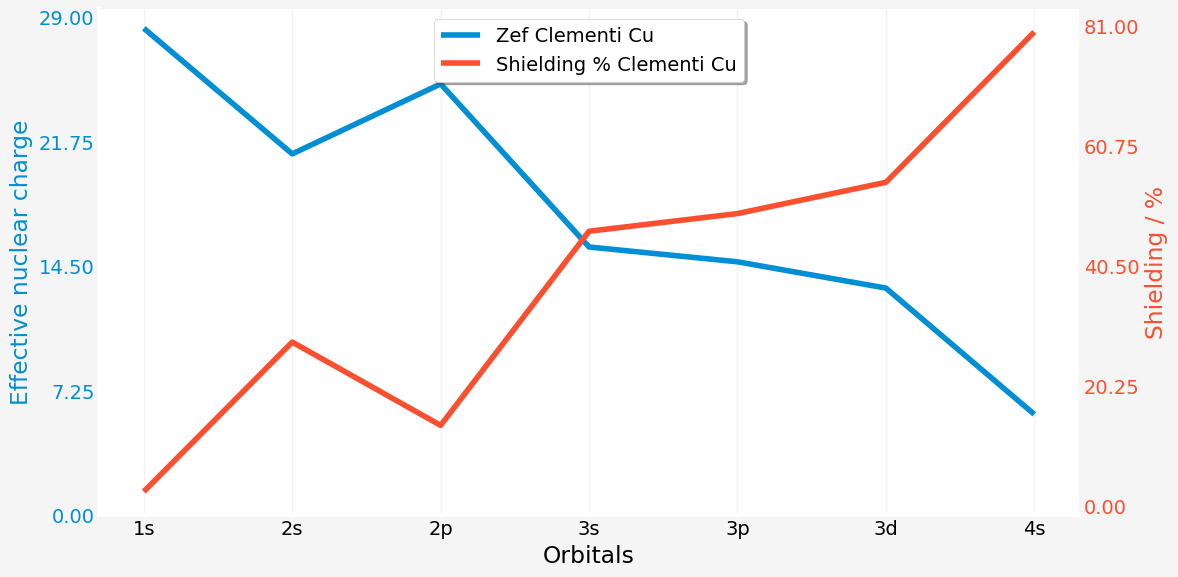

In [30]:
fig9, ax = plt.subplots()

zeff.plot_clementi_both("Cu", ax=ax)

plt.show()